In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('default')


In [2]:
df = pd.read_csv("ADAKITE.csv", encoding="iso-8859-1")
df = df.dropna(axis=1, thresh=int(0.5*len(df)))

In [41]:
def plot_harker(x,xlabel,y,ylabel,title=None,xlim=[40,80],ylim=None,color = "b",label=None):
    plt.scatter(x=x,y=y,marker="o", c=color,s=8,label = label)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim(xlim)
    try:
        plt.ylim(ylim)
    except:
        pass
    if title != None:
        plt.title(title)

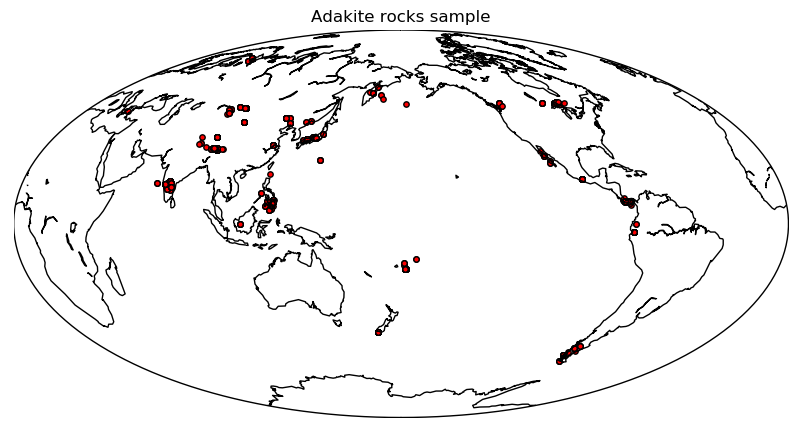

In [87]:
plt.figure(figsize=(10,10))
m = Basemap(lon_0=180,projection='hammer')
lon = df["LONGITUDE MIN"].dropna()
lat = df["LATITUDE MIN"].dropna()
lon = pd.to_numeric(lon, errors='ignore');
lat = pd.to_numeric(lat, errors='ignore');
lon_ = [];lat_ = []
for x, y in zip(lon,lat):
    try:
        xx, yy = m(float(x),float(y))
        lon_.append(xx);lat_.append(yy)
    except:
        pass
m.scatter(lon_, lat_, marker = "o" ,s=15, c="r" , edgecolors = "k", alpha = 1)
m.drawcoastlines()
plt.title('Adakite rocks sample')
plt.show()

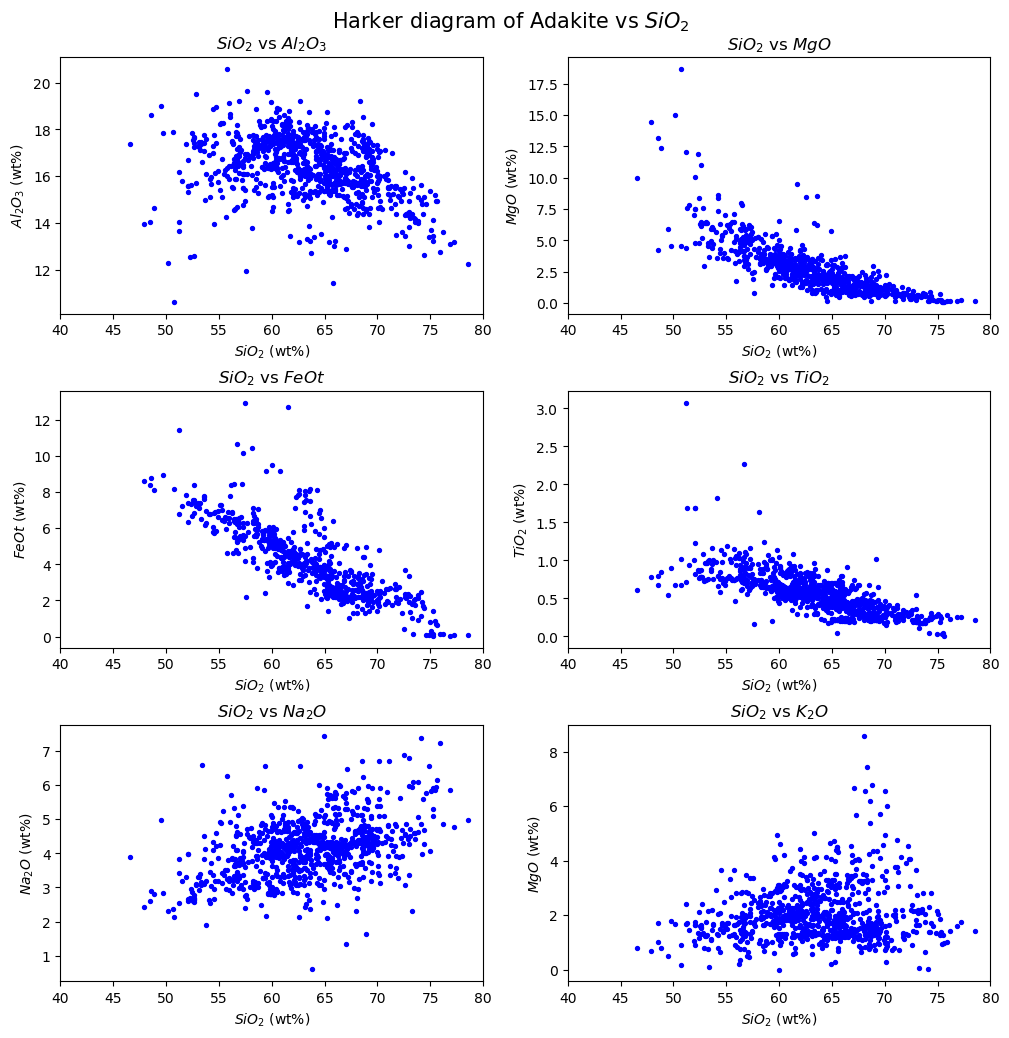

In [139]:
plt.figure(figsize=(12,12))
plt.subplot(321)
plot_harker(x=df["SIO2(WT%)"],xlabel=r'$SiO_2$ (wt%)',
            y=df["AL2O3(WT%)"],ylabel=(r'$Al_2O_3$ (wt%)'),title=r'$SiO_2$ vs $Al_2O_3$')
plt.subplot(322)
plot_harker(x=df["SIO2(WT%)"],xlabel=r'$SiO_2$ (wt%)',
            y=df["MGO(WT%)"],ylabel=(r'$MgO$ (wt%)'),title=r'$SiO_2$ vs $MgO$')
plt.subplot(323)
plot_harker(x=df["SIO2(WT%)"],xlabel=r'$SiO_2$ (wt%)',
            y=df["FEOT(WT%)"],ylabel=(r'$FeOt$ (wt%)'),title=r'$SiO_2$ vs $FeOt$')
plt.subplot(324)
plot_harker(x=df["SIO2(WT%)"],xlabel=r'$SiO_2$ (wt%)',
            y=df["TIO2(WT%)"],ylabel=(r'$TiO_2$ (wt%)'),title=r'$SiO_2$ vs $TiO_2$')
plt.subplot(325)
plot_harker(x=df["SIO2(WT%)"],xlabel=r'$SiO_2$ (wt%)',
            y=df["NA2O(WT%)"],ylabel=(r'$Na_2O$ (wt%)'),title=r'$SiO_2$ vs $Na_2O$')
plt.subplot(326)
plot_harker(x=df["SIO2(WT%)"],xlabel=r'$SiO_2$ (wt%)',
            y=df["K2O(WT%)"],ylabel=(r'$MgO$ (wt%)'),title=r'$SiO_2$ vs $K_2O$')
plt.suptitle(r'Harker diagram of Adakite vs $SiO_2$',y=0.92,fontsize=15)
plt.subplots_adjust(hspace=0.3)
plt.show()

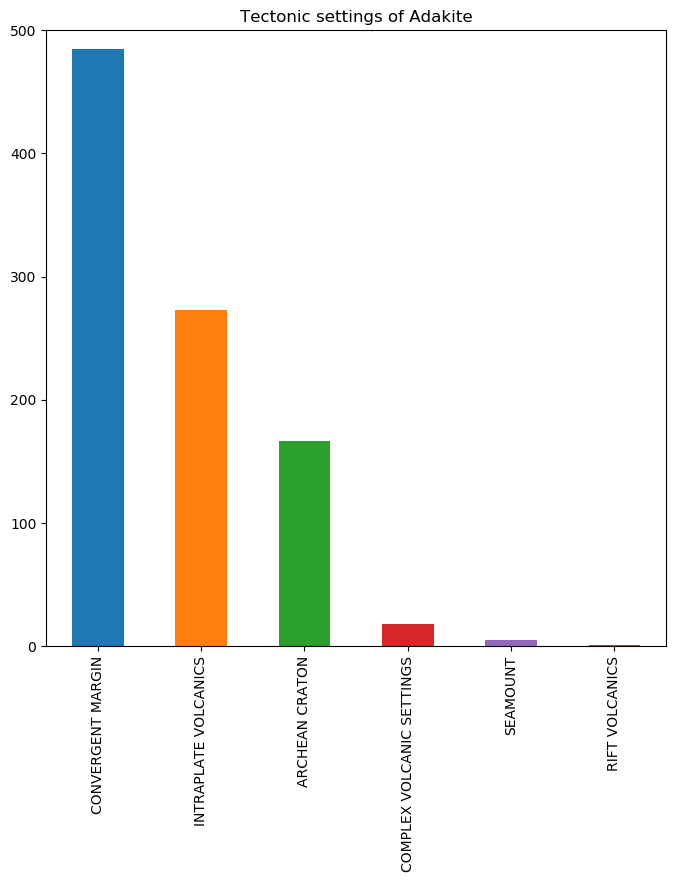

In [138]:
plt.figure(figsize=(8,8))
tec = df['TECTONIC SETTING'].dropna()
tec = tec.replace('ARCHEAN CRATON (INCLUDING GREENSTONE BELTS)','ARCHEAN CRATON')
tec_counts = tec.value_counts()
tec_counts.plot(kind="bar",fontsize=10)
plt.title('Tectonic settings of Adakite')
plt.ylim([0,500])
plt.show()


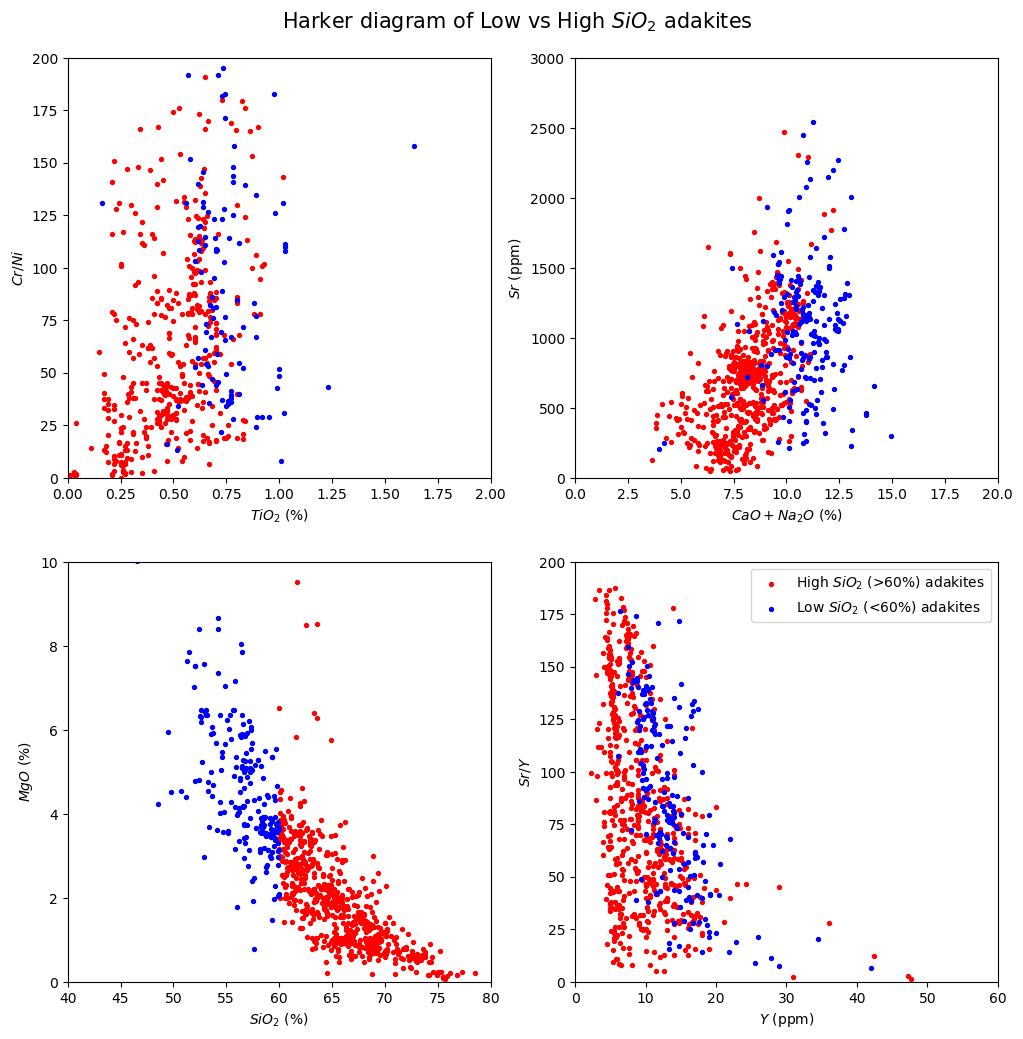

In [51]:
df['SR/Y'] = (df["SR(PPM)"]/df["Y(PPM)"])
df['CAO+NA2O'] = df['CAO(WT%)'] + df['NA2O(WT%)']
df['CR/NI'] = df['CR(PPM)'] + df['NI(PPM)']
df_hsa = df[df["SIO2(WT%)"] > 60]
df_lsa = df[df["SIO2(WT%)"] < 60]
plt.figure(figsize=(12,12))
plt.subplot(221)
plot_harker(x=df_hsa["TIO2(WT%)"],xlabel=r'$TiO_2$ (%)',
            y=df_hsa["CR/NI"],ylabel=(r'$Cr/Ni$'),
            xlim=[0,2],ylim=[0,200],color="r")
plot_harker(x=df_lsa["TIO2(WT%)"],xlabel=r'$TiO_2$ (%)',
            y=df_lsa["CR/NI"],ylabel=(r'$Cr/Ni$'),
            xlim=[0,2],ylim=[0,200],color="b")
plt.subplot(222)
plot_harker(x=df_hsa["CAO+NA2O"],xlabel=r'$CaO+Na_2O$ (%)',
            y=df_hsa["SR(PPM)"],ylabel=(r'$Sr$ (ppm)'),
            xlim=[0,20],ylim=[0,3000],color="r")
plot_harker(x=df_lsa["CAO+NA2O"],xlabel=r'$CaO+Na_2O$ (%)',
            y=df_lsa["SR(PPM)"],ylabel=(r'$Sr$ (ppm)'),
            xlim=[0,20],ylim=[0,3000],color="b")
plt.subplot(223)
plot_harker(x=df_hsa["SIO2(WT%)"],xlabel=r'$SiO_2$ (%)',
            y=df_hsa["MGO(WT%)"],ylabel=(r'$MgO$ (%)'),
            xlim=[40,80],ylim=[0,10],color="r")
plot_harker(x=df_lsa["SIO2(WT%)"],xlabel=r'$SiO_2$ (%)',
            y=df_lsa["MGO(WT%)"],ylabel=(r'$MgO$ (%)'),
            xlim=[40,80],ylim=[0,10],color="b")
plt.subplot(224)
plot_harker(x=df_hsa["Y(PPM)"],xlabel=r'$Y$ (ppm)',
            y=df_hsa["SR/Y"],ylabel=(r'$Sr/Y$'),
            xlim=[0,60],ylim=[0,200],color="r",label=r"High $SiO_2$ (>60%) adakites ")
plot_harker(x=df_lsa["Y(PPM)"],xlabel=r'$Y$ (ppm)',
            y=df_lsa["SR/Y"],ylabel=(r'$Sr/Y$'),
            xlim=[0,60],ylim=[0,200],color="b",label=r"Low $SiO_2$ (<60%) adakites")
plt.suptitle(r'Harker diagram of Low vs High $SiO_2$ adakites',y=0.92,fontsize=15)
plt.legend()
plt.show()

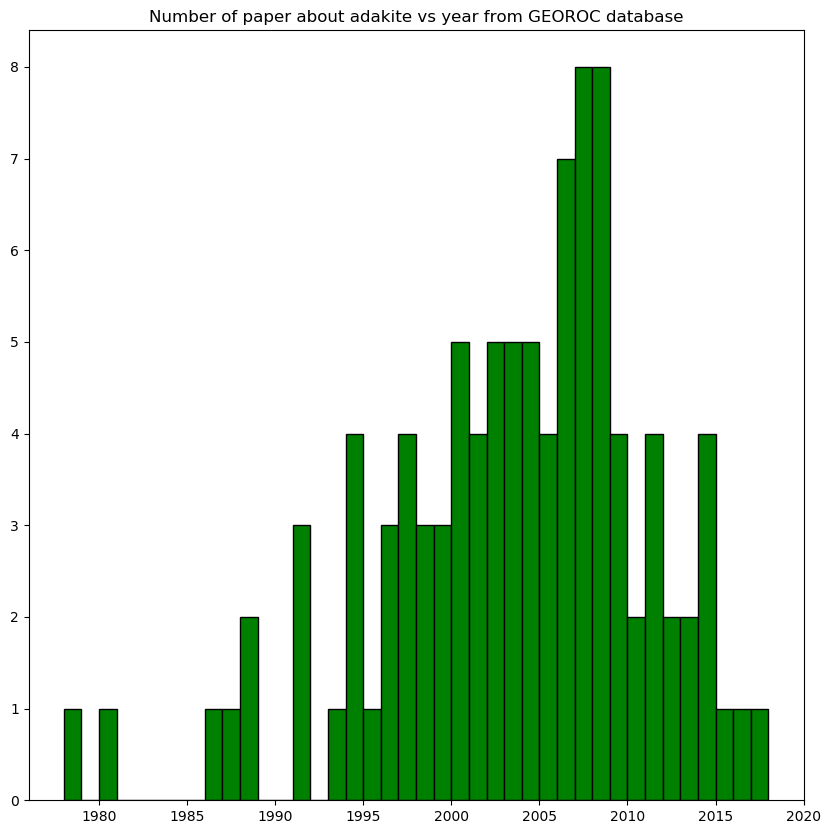

In [137]:
cite = [df.CITATIONS[x] for x in range(0,len(df)) if len(df.CITATIONS[x]) > 20 and df.CITATIONS[x].count('[') < 3]
year = []
for i in range(0,len(cite)):
    year.append(int(cite[i].split('[')[2].split(']')[0]))
plt.figure(figsize=(10,10))
plt.hist(year,40,
         facecolor='green',
         edgecolor='k')
plt.title('Number of paper about adakite vs year from GEOROC database')
plt.show()    